In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift, fftfreq
from scipy import signal
import nmrglue as ng

In [60]:
data = ng.bruker.read(r'24')

In [61]:
data[0].keys()

dict_keys(['procs', 'acqus', 'pprog', 'FILE_SIZE'])

In [62]:
data[0]['procs']

{'_coreheader': ['##TITLE= Parameter file, TopSpin 4.0.6',
  '##JCAMPDX= 5.0',
  '##DATATYPE= Parameter Values',
  '##NPOINTS= 13\t$$ modification sequence number',
  '##ORIGIN= Bruker BioSpin GmbH',
  '##OWNER= nmrsu'],
 '_comments': ['$$ 2019-07-10 19:22:48.570 +0100  IC\\dm4512@ch-dm4512',
  '$$ C:/Bruker/TopSpin4.0.6/examdata/Divya 600/24/pdata/1/procs',
  '$$ process C:\\Bruker\\TopSpin4.0.6\\prog\\mod\\proc1d.exe'],
 'ABSF1': 0,
 'ABSF2': 0,
 'ABSG': 0,
 'ABSL': 0,
 'ALPHA': 0,
 'AQORDER': 0,
 'ASSFAC': 0,
 'ASSFACI': 0,
 'ASSFACX': 0,
 'ASSWID': 0,
 'AUNMP': 'proc_1d',
 'AXLEFT': 0,
 'AXNAME': '',
 'AXNUC': '2H',
 'AXRIGHT': 0,
 'AXTYPE': 0,
 'AXUNIT': '',
 'AZFE': 0.1,
 'AZFW': 0.1,
 'BCFW': 0,
 'BC_mod': 0,
 'BYTORDP': 0,
 'COROFFS': 0,
 'CY': 15,
 'DATMOD': 0,
 'DC': 0,
 'DFILT': '',
 'DTYPP': 0,
 'ERETIC': False,
 'F1P': 0,
 'F2P': 0,
 'FCOR': 1,
 'FTSIZE': 32768,
 'FT_mod': 6,
 'GAMMA': 0,
 'GB': 0,
 'INTBC': 1,
 'INTSCL': 1,
 'ISEN': 128,
 'LB': 100,
 'LEV0': 0,
 'LPBIN': 

9.82318271119843e-06


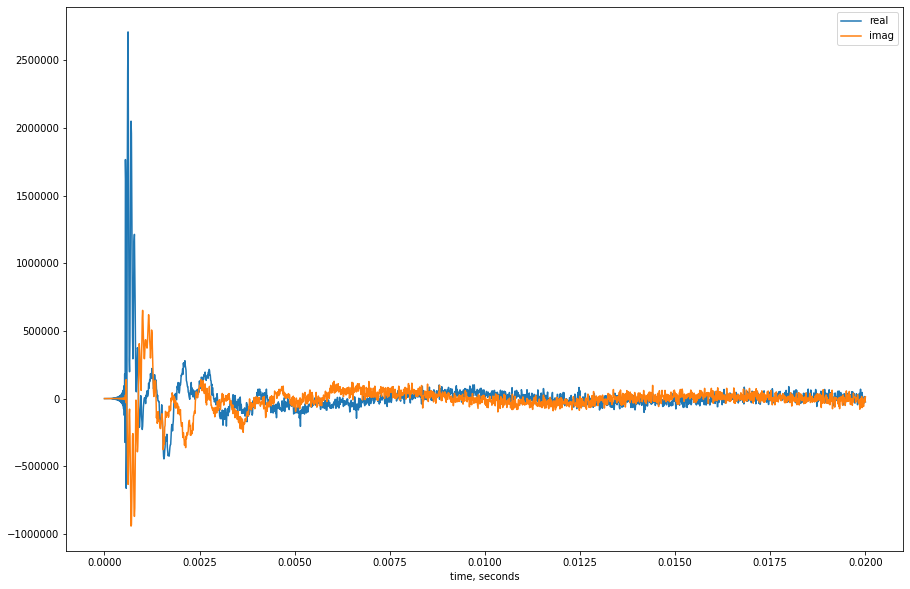

In [172]:
data_slice = data[1][12:]
n = len(data_slice) # window length
acqtime = 0.02 #sec
d = acqtime/n #sample spacing (inverse of sample rate)
t = np.linspace(0,acqtime,n)
print(d)


datar = data_slice.real
datai = data_slice.imag

plt.figure(figsize=(15,10))
plt.plot(t, datar, label='real')
plt.plot(t, datai, label='imag')
plt.xlabel('time, seconds')
plt.legend()

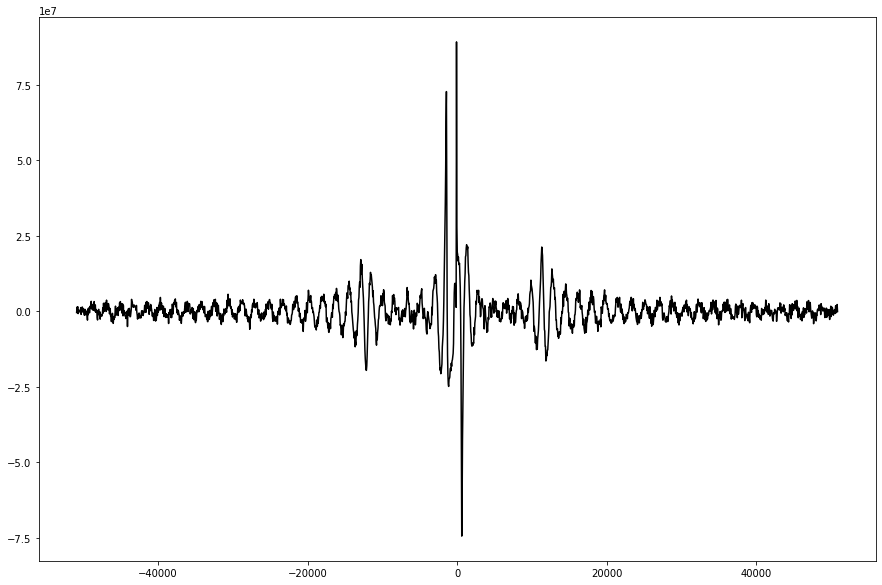

In [173]:
# frequencies and standard FFT
freq = fftshift(fftfreq(n,d))
data_fft = fftshift(fft(data_slice))


plt.figure(figsize=(15,10))
plt.plot(freq, data_fft.real, 'k')
plt.show()

Optimization terminated successfully.
         Current function value: 0.000053
         Iterations: 72
         Function evaluations: 135


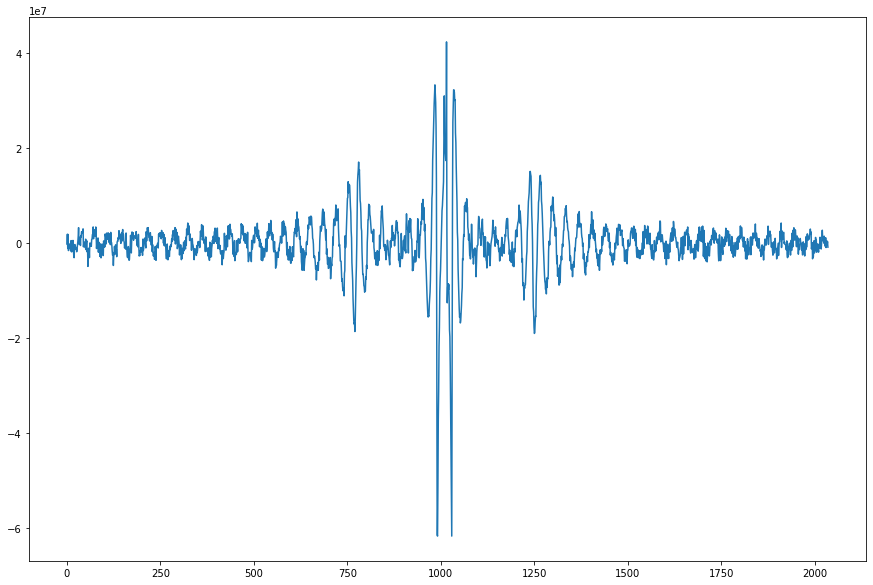

In [174]:
# phase correction
plt.figure(figsize=(15,10))
data_phase_corr = ng.proc_autophase.autops(data_fft, 'peak_minima', 1,0) # 'acme'
plt.plot(data_phase_corr)

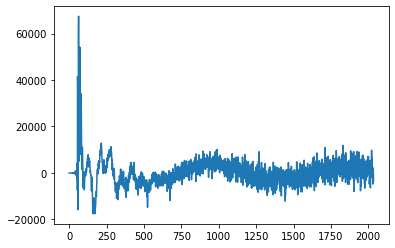

In [175]:
plt.plot(np.sqrt(t)*data_slice)

In [190]:
def depake(omega, t, g):
    return np.sqrt(abs(omega))*(1-1j)*fftshift(fft(g*np.sqrt(t)))

(-20000, 20000)

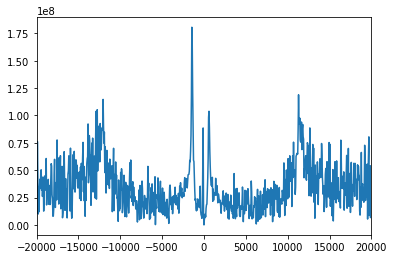

In [191]:
data_depake = depake(freq, t, data_slice)
plt.plot(freq,abs(data_depake))
plt.xlim(-20000,20000)

Optimization terminated successfully.
         Current function value: 35653920.626149
         Iterations: 116
         Function evaluations: 233


(-20000, 20000)

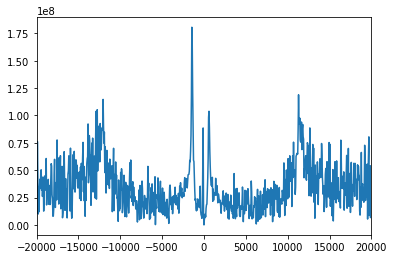

In [192]:
plt.plot(freq,abs(ng.proc_autophase.autops(data_depake, 'peak_minima', 0,0))) # 'acme'
plt.xlim(-20000,20000)